In [9]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the dataset
file_path = 'merged_data copy.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
print(data.head())
print(data.info())

# Print the columns to check for the target variable
print("Columns in the dataset:", data.columns.tolist())

# Define the target variable
target_variable = 'Automation Composite Index'

# Check if the target variable exists in the DataFrame
if target_variable in data.columns:
    # Separate the features and the target variable
    features = data.drop(columns=[target_variable])
    
    # Identify non-numeric columns
    non_numeric_cols = features.select_dtypes(include=['object']).columns.tolist()
    print("Non-numeric columns to handle:", non_numeric_cols)

    # Convert categorical variables to numeric using one-hot encoding
    features_encoded = pd.get_dummies(features, columns=non_numeric_cols, drop_first=True)

    # Identify and count missing values
    missing_values = features_encoded.isnull().sum()
    print("Missing values per feature:\n", missing_values)

    # Initialize KNN Imputer
    imputer = KNNImputer(n_neighbors=5)

    # Fill missing values in the features using KNN imputation
    features_imputed = imputer.fit_transform(features_encoded)

    # Create a DataFrame from the imputed features
    features_filled = pd.DataFrame(features_imputed, columns=features_encoded.columns)

    # Check if there are still any missing values in the features after filling
    remaining_missing_values = features_filled.isnull().sum().sum()
    print(f"Remaining missing values after imputation: {remaining_missing_values}")

    # Combine the imputed features with the target variable
    data_imputed = pd.concat([features_filled, data[target_variable]], axis=1)

    # Now data_imputed is ready for model training
    print(data_imputed.head())
else:
    raise KeyError(f"'{target_variable}' not found in the DataFrame columns.")


     Country Name  age_dependency  Automation Composite Index  GDP per capita  \
0     Afghanistan       82.615905                    0.137841     1955.212904   
1         Albania       49.536112                    0.331142    18059.937907   
2         Algeria       58.875264                    0.217028    15347.532423   
3  American Samoa       53.240046                         NaN             NaN   
4         Andorra       38.827159                    0.681806    64526.556097   

   Labor force participation  unemployment rate  employment_manufacturing  \
0                     36.950             14.386                 18.340073   
1                     60.176             11.584                 21.400145   
2                     42.324             11.814                 30.850998   
3                        NaN                NaN                       NaN   
4                        NaN                NaN                       NaN   

   internet_penetration  high_tech_exports       R

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Filter the dataset to only include rows where the target variable is not NaN
data_filtered = data_imputed[data_imputed[target_variable].notnull()]

# Separate the features and the target variable
features = data_filtered.drop(columns=[target_variable])
target = data_filtered[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Now, predict the missing values in the original data
data_imputed[target_variable].fillna(pd.Series(model.predict(features)), inplace=True)

# Display the updated DataFrame with filled target variable
print(data_imputed.head())


Root Mean Squared Error: 0.0720
R² Score: 0.8532
   age_dependency  GDP per capita  Labor force participation  \
0       82.615905     1955.212904                    36.9500   
1       49.536112    18059.937907                    60.1760   
2       58.875264    15347.532423                    42.3240   
3       53.240046     8398.063071                    63.0232   
4       38.827159    64526.556097                    57.9640   

   unemployment rate  employment_manufacturing  internet_penetration  \
0            14.3860                 18.340073               18.4000   
1            11.5840                 21.400145               83.1356   
2            11.8140                 30.850998               71.2432   
3             6.5374                 13.840971               62.8070   
4             7.1014                 17.034560               94.4855   

   high_tech_exports        RD  electricity_access  mobile_subscriptions  ...  \
0           0.000000  0.262630               85.30  

/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_53474/676899906.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_imputed[target_variable].fillna(pd.Series(model.predict(features)), inplace=True)


In [39]:
data.head()

,Country Name,age_dependency,Automation Composite Index,GDP per capita,Labor force participation,unemployment rate,employment_manufacturing,internet_penetration,high_tech_exports,RD,...,urbanization,STEM_graduates,trade_GDP,CCS,ICT_imports,Government Effectiveness,RegulatoryQuality,RuleofLaw,global_connectedness,FDI
0,Afghanistan,82.615905,0.137841,1955.212904,36.950,14.386,18.340073,18.4000,0.000000,NaN,...,26.933,NaN,72.885470,6.868971,2.07,-1.879552,-1.271806,-1.658442,41.181764,0.144401
1,Albania,49.536112,0.331142,18059.937907,60.176,11.584,21.400145,83.1356,0.059641,0.15412,...,64.603,5.41538,84.538291,9.809020,0.21,0.065063,0.159354,-0.165779,48.888004,7.026168
2,Algeria,58.875264,0.217028,15347.532423,42.324,11.814,30.850998,71.2432,0.960299,0.53432,...,75.268,31.14856,46.195894,42.463183,4.87,-0.513090,-1.063573,-0.832473,46.085942,0.506786
3,American Samoa,53.240046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.39552,...,87.235,NaN,124.684271,NaN,NaN,0.667918,0.545900,1.221118,NaN,NaN
4,Andorra,38.827159,0.681806,64526.556097,NaN,NaN,NaN,94.4855,11.659386,NaN,...,87.774,4.34783,NaN,47.854881,5.89,1.495305,1.398334,1.485450,50.433429,NaN


In [12]:
# Step 1: Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

# Step 2: Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Step 4: Try different models
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor()
}

# Step 5: Evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}')

# Step 6: Hyperparameter tuning for the best performing model (example for Ridge Regression)
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_

# Step 7: Evaluate the best model
y_pred_best = best_ridge.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
best_r2 = r2_score(y_test, y_pred_best)

print(f'Best Ridge Model - RMSE: {best_rmse:.4f}, R²: {best_r2:.4f}')


Ridge - RMSE: 0.0866, R²: 0.7877
Lasso - RMSE: 0.1892, R²: -0.0140
ElasticNet - RMSE: 0.1892, R²: -0.0140
RandomForest - RMSE: 0.0653, R²: 0.8793
Best Ridge Model - RMSE: 0.0866, R²: 0.7878


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Step 2: Select only numeric features and handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors based on your preference
features_numeric = features.select_dtypes(include=[np.number])
features_imputed = imputer.fit_transform(features_numeric)

# Split the target (y) into available and missing subsets
available_data = ~target.isna()  # Boolean mask for rows with non-missing y
X_full = features_imputed  # Features after imputation
y_full = target  # Original target with missing values

# Split into available (non-missing y) and missing y
X_train_full, y_train_full = X_full[available_data], y_full[available_data]
X_predict = X_full[~available_data]  # Rows where y is missing

# Normalize the features for training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_full, test_size=0.2, random_state=42)

# Step 5: Define models to try
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'GradientBoosting': GradientBoostingRegressor()
}

# Step 6: Evaluate models
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append results for each model
    results.append({
        'Model': model_name,
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae
    })

# Convert results to a DataFrame for a tabular view
results_df = pd.DataFrame(results)
print(results_df)

# Step 7: Hyperparameter tuning for the best performing model (example for Ridge Regression)
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_

# Step 8: Evaluate the best model after tuning
y_pred_best = best_ridge.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
best_r2 = r2_score(y_test, y_pred_best)
best_mae = mean_absolute_error(y_test, y_pred_best)

# Display the results of the best Ridge model after tuning
print(f'Best Ridge Model - RMSE: {best_rmse:.4f}, R²: {best_r2:.4f}, MAE: {best_mae:.4f}')


              Model      RMSE        R²       MAE
0             Ridge  0.067050  0.872693  0.040608
1             Lasso  0.189225 -0.013950  0.159014
2        ElasticNet  0.189225 -0.013950  0.159014
3      RandomForest  0.063746  0.884929  0.042442
4  LinearRegression  0.067408  0.871328  0.040845
5  GradientBoosting  0.077255  0.830991  0.053604
Best Ridge Model - RMSE: 0.0663, R²: 0.8754, MAE: 0.0412


In [37]:
X_predict_scaled = scaler.transform(X_predict)  # Scale the missing data
y_pred_missing = best_ridge.predict(X_predict_scaled)  # Predict missing values

In [41]:
# Step 1: Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Assuming 'data' is your original DataFrame and 'target_variable' is the name of your target column
# Make a copy of 'data' to avoid modifying the original DataFrame directly
data_copy = data.copy()

# Step 2: Select only numeric features and handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
features_numeric = data_copy.select_dtypes(include=[np.number]).drop(columns=[target_variable])  # Drop target column
features_imputed = imputer.fit_transform(features_numeric)

# Identify rows with available and missing target values
available_data = ~data_copy[target_variable].isna()  # Boolean mask for rows with non-missing y
missing_data = data_copy[target_variable].isna()  # Boolean mask for rows with missing y

# Extract feature matrix (X) and target vector (y) for non-missing rows only
X_full = features_imputed  # Features after imputation
y_full = data_copy[target_variable]  # Target column with missing values
X_train_full, y_train_full = X_full[available_data], y_full[available_data]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_full, test_size=0.2, random_state=42)

# Train your model and predict missing values as before
best_ridge.fit(X_train, y_train)
y_pred_missing = best_ridge.predict(scaler.transform(X_full[missing_data]))  # Predict missing values in target

# Incorporate predictions back into the original dataset
data_copy.loc[missing_data, target_variable] = y_pred_missing  # Fill missing values in target column with predictions

# Display the updated DataFrame
data_copy.head()


,Country Name,age_dependency,Automation Composite Index,GDP per capita,Labor force participation,unemployment rate,employment_manufacturing,internet_penetration,high_tech_exports,RD,...,urbanization,STEM_graduates,trade_GDP,CCS,ICT_imports,Government Effectiveness,RegulatoryQuality,RuleofLaw,global_connectedness,FDI
0,Afghanistan,82.615905,0.137841,1955.212904,36.950,14.386,18.340073,18.4000,0.000000,NaN,...,26.933,NaN,72.885470,6.868971,2.07,-1.879552,-1.271806,-1.658442,41.181764,0.144401
1,Albania,49.536112,0.331142,18059.937907,60.176,11.584,21.400145,83.1356,0.059641,0.15412,...,64.603,5.41538,84.538291,9.809020,0.21,0.065063,0.159354,-0.165779,48.888004,7.026168
2,Algeria,58.875264,0.217028,15347.532423,42.324,11.814,30.850998,71.2432,0.960299,0.53432,...,75.268,31.14856,46.195894,42.463183,4.87,-0.513090,-1.063573,-0.832473,46.085942,0.506786
3,American Samoa,53.240046,0.196833,NaN,NaN,NaN,NaN,NaN,NaN,0.39552,...,87.235,NaN,124.684271,NaN,NaN,0.667918,0.545900,1.221118,NaN,NaN
4,Andorra,38.827159,0.681806,64526.556097,NaN,NaN,NaN,94.4855,11.659386,NaN,...,87.774,4.34783,NaN,47.854881,5.89,1.495305,1.398334,1.485450,50.433429,NaN


In [42]:
# Check for missing values in the 'Automation Composite Index' column
missing_automation_composite = data_copy['Automation Composite Index'].isna().sum()
print(f"Missing values in 'Automation Composite Index': {missing_automation_composite}")


Missing values in 'Automation Composite Index': 0


In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
# Replace with the path to your local shapefile
world = gpd.read_file("/Users/nancybaraka/Documents/GitHub/Final-Project/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Continue with the rest of the code
# Step 1: Identify which countries had missing values in the original 'data' DataFrame
missing_countries = data['Automation Composite Index'].isna()

# Step 2: Create a 'Predicted' column in data_copy, marking countries where values were originally missing
data_copy['Predicted'] = missing_countries

In [47]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


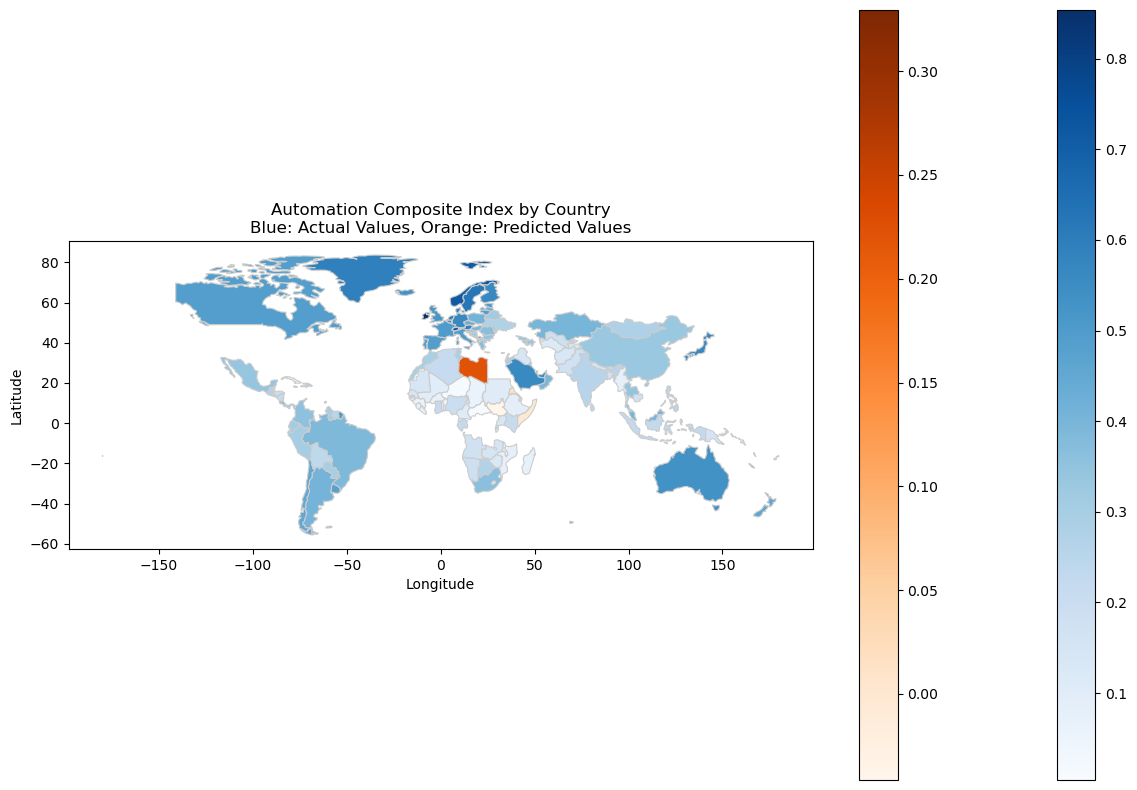

In [49]:
# Step 3: Merge the map data with automation composite data
merged_data = world.merge(data_copy, how="left", left_on="SOVEREIGNT", right_on="Country Name")
# Step 4: Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot countries with actual values (Predicted == False)
merged_data[merged_data['Predicted'] == False].plot(column='Automation Composite Index', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Overlay countries with predicted values (Predicted == True) in a different color/marker
merged_data[merged_data['Predicted'] == True].plot(column='Automation Composite Index', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the map
plt.title("Automation Composite Index by Country\nBlue: Actual Values, Orange: Predicted Values")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [51]:
# Get country names from both DataFrames
world_countries = set(world['SOVEREIGNT'].unique())
data_countries = set(data_copy['Country Name'].unique())

# Find mismatches
missing_in_world = data_countries - world_countries
missing_in_data = world_countries - data_countries

print("Countries in 'data_copy' but missing in 'world':")
print(missing_in_world)

print("\nCountries in 'world' but missing in 'data_copy':")
print(missing_in_data)


Countries in 'data_copy' but missing in 'world':
{'San Marino', 'Cayman Islands', 'Comoros', 'Arab World', 'New Caledonia', 'Tanzania', 'Middle income', 'Caribbean small states', 'Kiribati', 'Europe & Central Asia', 'Lao PDR', 'Brunei Darussalam', 'Turkiye', 'British Virgin Islands', 'Small states', 'Sub-Saharan Africa (excluding high income)', 'IDA total', 'Faroe Islands', 'North America', 'East Asia & Pacific', 'Isle of Man', "Korea, Dem. People's Rep.", 'Serbia', 'Slovak Republic', 'Guam', 'Macao SAR, China', 'Middle East & North Africa', 'World', 'Bermuda', 'Congo, Rep.', 'Timor-Leste', 'Tuvalu', 'Low income', 'IDA & IBRD total', 'Sint Maarten (Dutch part)', 'Yemen, Rep.', 'Central Europe and the Baltics', 'United States', 'Barbados', 'High income', 'Cabo Verde', 'Latin America & Caribbean (IDA & IBRD)', "Cote d'Ivoire", 'Europe & Central Asia (excluding high income)', 'Virgin Islands (U.S.)', 'Nauru', 'Kyrgyz Republic', 'Iran, Islamic Rep.', 'Antigua and Barbuda', 'Curacao', 'Hong

In [52]:
# Define a mapping dictionary for mismatched country names
country_name_mapping = {
    'Cote d\'Ivoire': 'Ivory Coast',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Turkiye': 'Turkey',
    'Gambia, The': 'Gambia',
    'Timor-Leste': 'East Timor',
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Brunei Darussalam': 'Brunei',
    'United States': 'United States of America',
    'Korea, Rep.': 'South Korea',
    'Lao PDR': 'Laos',
    'Tanzania': 'United Republic of Tanzania',
    'Russian Federation': 'Russia',
    'Syrian Arab Republic': 'Syria',
    'Korea, Dem. People\'s Rep.': 'North Korea',
    'Iran, Islamic Rep.': 'Iran',
    'Yemen, Rep.': 'Yemen',
    'Eswatini': 'eSwatini',
    'Slovak Republic': 'Slovakia',
    'Venezuela, RB': 'Venezuela',
    'Egypt, Arab Rep.': 'Egypt',
    'Bahamas, The': 'The Bahamas',
    'Congo, Rep.': 'Republic of the Congo',
    'Vietnam': 'Viet Nam'  # Reverse mapping for 'Viet Nam' in data_copy to 'Vietnam' in world
}

# Apply the mapping to data_copy's 'Country Name' column
data_copy['Country Name'] = data_copy['Country Name'].replace(country_name_mapping)

In [53]:
# Get the updated list of country names after applying the mapping
data_countries_updated = set(data_copy['Country Name'].unique())

# Check for any remaining mismatches
remaining_missing_in_world = data_countries_updated - world_countries
remaining_missing_in_data = world_countries - data_countries_updated

print("Remaining countries in 'data_copy' but missing in 'world':")
print(remaining_missing_in_world)

print("\nRemaining countries in 'world' but missing in 'data_copy':")
print(remaining_missing_in_data)


Remaining countries in 'data_copy' but missing in 'world':
{'San Marino', 'Cayman Islands', 'Comoros', 'Arab World', 'New Caledonia', 'Middle income', 'Caribbean small states', 'Kiribati', 'Europe & Central Asia', 'British Virgin Islands', 'Small states', 'Sub-Saharan Africa (excluding high income)', 'IDA total', 'Faroe Islands', 'North America', 'East Asia & Pacific', 'Isle of Man', 'Serbia', 'Guam', 'Macao SAR, China', 'Middle East & North Africa', 'World', 'Bermuda', 'Tuvalu', 'Low income', 'IDA & IBRD total', 'Sint Maarten (Dutch part)', 'Central Europe and the Baltics', 'Barbados', 'High income', 'Cabo Verde', 'Latin America & Caribbean (IDA & IBRD)', 'Europe & Central Asia (excluding high income)', 'Virgin Islands (U.S.)', 'Nauru', 'Antigua and Barbuda', 'Curacao', 'Hong Kong SAR, China', 'Euro area', 'OECD members', 'Sub-Saharan Africa', 'Africa Western and Central', 'Singapore', 'Upper middle income', 'Post-demographic dividend', 'Dominica', 'St. Kitts and Nevis', 'Mauritius', 

In [54]:
# Extend the country mapping for remaining countries
country_name_mapping.update({
    'Viet Nam': 'Vietnam',
    'Serbia': 'Republic of Serbia'
})

# Apply the extended mapping
data_copy['Country Name'] = data_copy['Country Name'].replace(country_name_mapping)

# Filter out non-country regions and groupings from data_copy
regions_to_exclude = [
    'San Marino', 'Cayman Islands', 'Comoros', 'Arab World', 'New Caledonia', 'Middle income',
    'Caribbean small states', 'Kiribati', 'Europe & Central Asia', 'British Virgin Islands', 
    'Small states', 'Sub-Saharan Africa (excluding high income)', 'IDA total', 'Faroe Islands', 
    'North America', 'East Asia & Pacific', 'Isle of Man', 'World', 'Bermuda', 'Low income', 
    'IDA & IBRD total', 'Sint Maarten (Dutch part)', 'High income', 'Cabo Verde', 
    'Latin America & Caribbean (IDA & IBRD)', 'Europe & Central Asia (excluding high income)', 
    'Virgin Islands (U.S.)', 'Nauru', 'Antigua and Barbuda', 'Curacao', 'Hong Kong SAR, China', 
    'Euro area', 'OECD members', 'Sub-Saharan Africa', 'Africa Western and Central', 'Singapore', 
    'Upper middle income', 'Post-demographic dividend', 'Dominica', 'St. Kitts and Nevis', 
    'Mauritius', 'Europe & Central Asia (IDA & IBRD)', 'Tonga', 'Other small states', 
    'Pre-demographic dividend', 'IDA only', 'Greenland', 'Turks and Caicos Islands', 'Andorra', 
    'Fragile and conflict affected situations', 'East Asia & Pacific (IDA & IBRD)', 'Marshall Islands', 
    'Middle East & North Africa (excluding high income)', 'Puerto Rico', 'Gibraltar', 
    'Low & middle income', 'IDA blend', 'French Polynesia', 'South Asia (IDA & IBRD)', 
    'Sao Tome and Principe', 'Pacific island small states', 'IBRD only', 
    'Heavily indebted poor countries (HIPC)', 'St. Vincent and the Grenadines', 
    'St. Martin (French part)', 'European Union', 'Least developed countries: UN classification', 
    'St. Lucia', 'Northern Mariana Islands', 'Micronesia, Fed. Sts.', 'Samoa', 'Lower middle income', 
    'Late-demographic dividend', 'Channel Islands', 'Middle East & North Africa (IDA & IBRD)', 'Malta', 
    'Early-demographic dividend', 'Monaco', 'Bahrain', 'Latin America & Caribbean', 
    'Africa Eastern and Southern', 'East Asia & Pacific (excluding high income)', 'Grenada', 
    'American Samoa', 'South Asia', 'Aruba', 'Sub-Saharan Africa (IDA & IBRD)', 'Maldives', 
    'Latin America & Caribbean (excluding high income)', 'Palau', 'West Bank and Gaza', 
    'Liechtenstein', 'Seychelles'
]

# Exclude these regions from data_copy
data_copy = data_copy[~data_copy['Country Name'].isin(regions_to_exclude)]


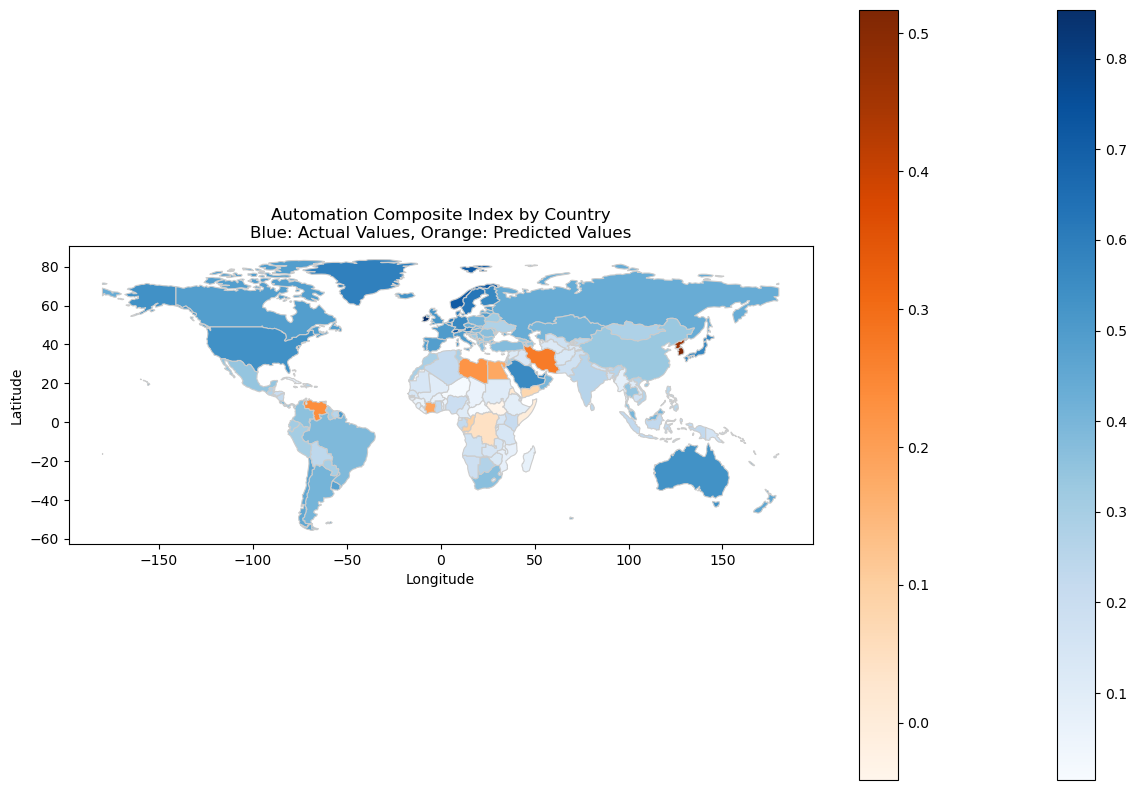

In [55]:
# Step 1: Merge the world map data with the updated automation composite data
merged_data = world.merge(data_copy, how="left", left_on="SOVEREIGNT", right_on="Country Name")

# Step 2: Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot countries with actual values (Predicted == False)
merged_data[merged_data['Predicted'] == False].plot(column='Automation Composite Index', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Overlay countries with predicted values (Predicted == True) in a different color
merged_data[merged_data['Predicted'] == True].plot(column='Automation Composite Index', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the map
plt.title("Automation Composite Index by Country\nBlue: Actual Values, Orange: Predicted Values")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Features shape: (171, 335)
Target shape: (171,)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - RMSE: 0.05962930571981983, R²: 0.8993119580407387


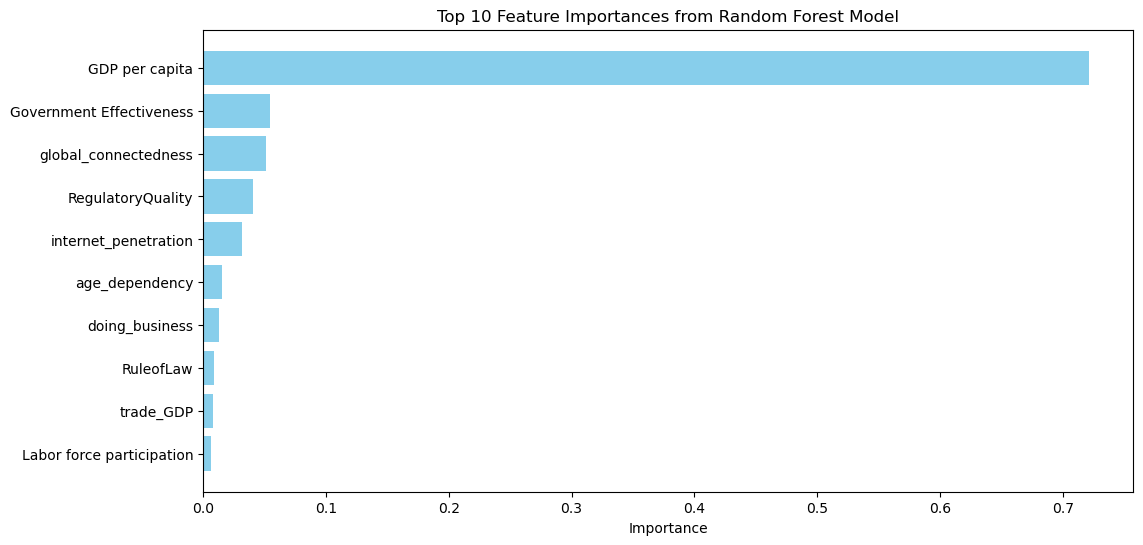

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define features and target variable
features = data.drop(columns=['Automation Composite Index'])
target = data['Automation Composite Index']

# Remove any rows where the target is NaN
X = features[target.notnull()]
y = target.dropna()

# Ensure that both feature and target have the same number of samples
X = X.loc[y.index]  # Align X to match y

# One-hot encoding for categorical features (e.g., Country Name)
X = pd.get_dummies(X, drop_first=True)

# Print shapes to verify
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - RMSE: {rmse}, R²: {r2}")

# Get feature importances
feature_importances = random_forest_model.feature_importances_
features_list = X.columns  # Use X to refer to the features

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = (-grid_search.best_score_) ** 0.5  # RMSE

print(f"Best Parameters: {best_params}")
print(f"Best RMSE from Grid Search: {best_score:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE from Grid Search: 0.0739


In [19]:
# Train the final Random Forest model with the best parameters
final_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_features='sqrt',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model on the training data
final_rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_final = final_rf_model.predict(X_test)

# Evaluate the model performance
final_rmse = mean_squared_error(y_test, y_pred_final, squared=False)
final_r2 = r2_score(y_test, y_pred_final)

print(f"Final Random Forest - RMSE: {final_rmse:.4f}, R²: {final_r2:.4f}")


Final Random Forest - RMSE: 0.0714, R²: 0.8557


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have the feature importances from the Random Forest model
feature_importances = random_forest_model.feature_importances_
features_list = features.columns

# Ensure the feature_importances and features_list have the same length
if len(feature_importances) != len(features_list):
    print(f"Length of feature importances: {len(feature_importances)}")
    print(f"Length of feature list: {len(features_list)}")
else:
    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plotting the top 10 feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importances from Random Forest Model')
    plt.show()


Length of feature importances: 335
Length of feature list: 23


Length of feature importances: 335
Length of features used: 335


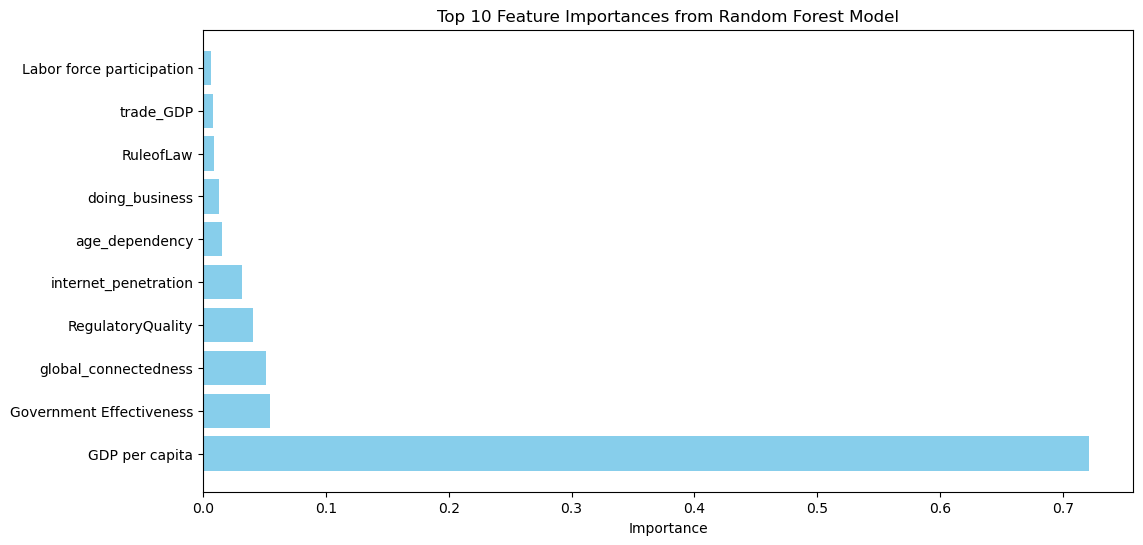

In [22]:
# Ensure to use the features that were actually used to train the model
features_used = X.columns  # or however you have named your features DataFrame

# Train the Random Forest model again if needed
random_forest_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = random_forest_model.feature_importances_

# Check the length again
print(f"Length of feature importances: {len(feature_importances)}")
print(f"Length of features used: {len(features_used)}")

# Create a DataFrame for feature importances if lengths match
if len(feature_importances) == len(features_used):
    importance_df = pd.DataFrame({'Feature': features_used, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plotting the top 10 feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importances from Random Forest Model')
    plt.show()
else:
    print("Mismatch in lengths. Please check the features used in the model.")


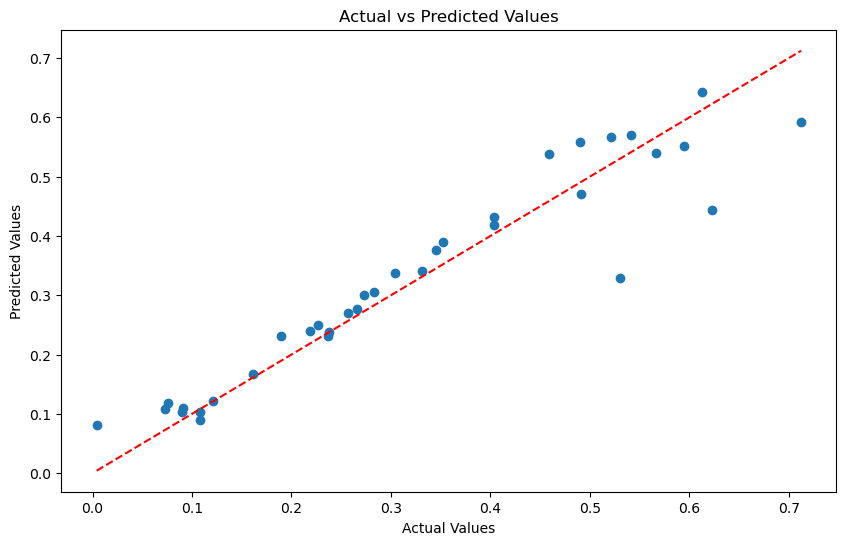

In [23]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


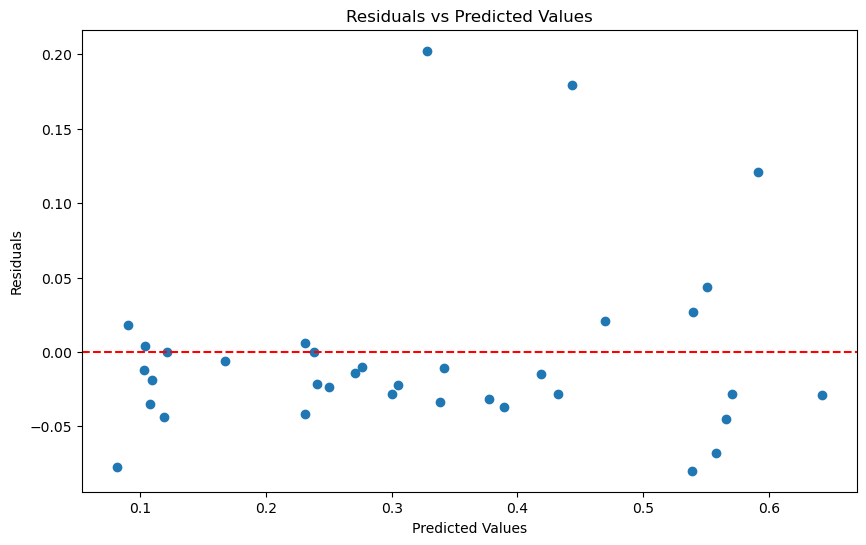

In [24]:
# Residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


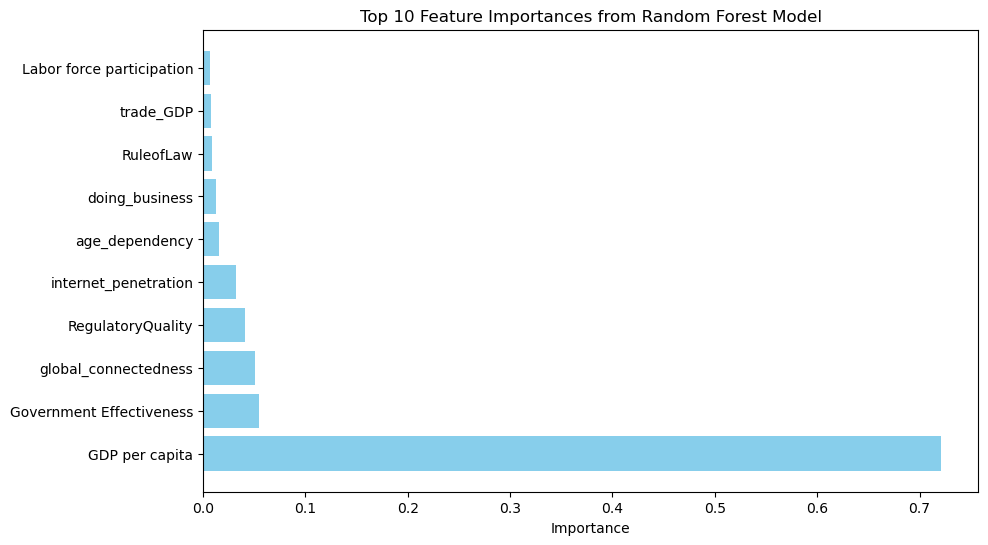

In [26]:
# Check features used in the model
features_used = X_train.columns

# Get feature importances from the Random Forest model
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features_used, 'Importance': feature_importances})

# Sort and get the top 10 feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.show()


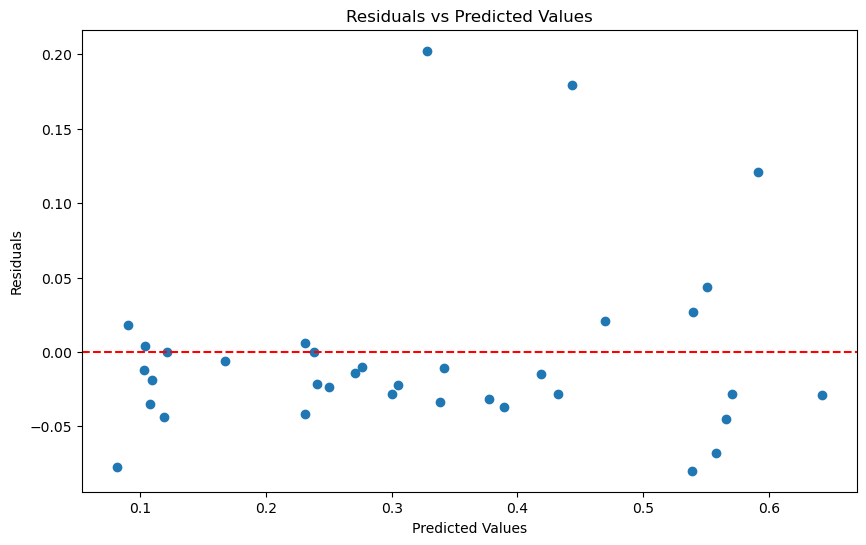

In [27]:
# Calculate residuals
residuals = y_test - y_pred

# Residuals vs Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [29]:
import numpy as np
import pandas as pd

# Let's assume `y_test` is the actual target values and `y_pred` is the predicted values from the model
# We can calculate the residuals and identify the outliers

# Calculate residuals
residuals = y_test - y_pred

# Create a DataFrame to analyze the outliers
outlier_analysis = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
})

# Define a threshold for outliers (e.g., 2 standard deviations from the mean)
threshold = 2 * np.std(residuals)

# Identify outliers
outliers = outlier_analysis[np.abs(outlier_analysis['Residual']) > threshold]

# Display outliers
outliers.reset_index(drop=True)


,Actual,Predicted,Residual
0,0.530758,0.328369,0.202389
1,0.712406,0.591602,0.120804
2,0.622466,0.443347,0.179119


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains the original dataset with features
# Ensure only numeric features are included
numeric_features = features.select_dtypes(include=[np.number])

# Get predictions from the model
predictions = model.predict(numeric_features)

# Calculate residuals
residuals = predictions - data['Automation Composite Index'].dropna()

# Create a DataFrame for analysis
data_with_residuals = pd.DataFrame({
    'Actual': data['Automation Composite Index'].dropna(),
    'Predicted': predictions,
    'Residual': residuals
})

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(data_with_residuals['Residual'], bins=20, kde=True)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Visualize the residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(data_with_residuals['Predicted'], data_with_residuals['Residual'])
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plot feature importances (ensuring to get the correct length)
importance_df = pd.DataFrame({'Feature': numeric_features.columns, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 21 features, but RandomForestRegressor is expecting 479 features as input.

In [32]:
# Assuming 'features' contains the training features used in the model
# Ensure 'features' has the same preprocessing as used during model training
features_for_prediction = features.copy()  # Make sure you have a copy of the original features

# Get predictions from the model using the original feature set
predictions = model.predict(features_for_prediction)

# Calculate residuals
data['Predicted'] = predictions
data['Residual'] = data['Predicted'] - data['Automation Composite Index']

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(data['Residual'], bins=20, kde=True)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Visualize residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(data['Predicted'], data['Residual'])
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Now plotting feature importances
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Afghanistan'